# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import owkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating Dataframe
cities_data=pd.DataFrame(cities,columns=["City"])
labels=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
for each_label in labels:
    cities_data[each_label]=""

# Fetching City Data
record=0
units="Imperial"
for index, row in cities_data.iterrows():
    city=row["City"]
    try:
        url_string=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={owkey}&units={units}"
        response=requests.get(url_string)
        city_info=response.json()
        #feeding data into dataframe
        cities_data.loc[index,"Lat"]=city_info["coord"]["lat"]
        cities_data.loc[index,"Lng"]=city_info["coord"]["lon"]
        cities_data.loc[index,"Max Temp"]=city_info["main"]["temp_max"]
        cities_data.loc[index,"Humidity"]=city_info["main"]["humidity"]
        cities_data.loc[index,"Cloudiness"]=city_info["clouds"]["all"]
        cities_data.loc[index,"Wind Speed"]=city_info["wind"]["speed"]
        cities_data.loc[index,"Country"]=city_info["sys"]["country"]
        cities_data.loc[index,"Date"]=city_info["dt"]
        print(f"Processing Record {record}| {city}")
        record=record+1
    except KeyError:
        pass
        print(f"{city} did not exist. Skipping...")
print("-"*30)
print("End of Records")


Processing Record 0| vanimo
Processing Record 1| evensk
Processing Record 2| adand
Processing Record 3| ancud
Processing Record 4| hermanus
Processing Record 5| pisco
Processing Record 6| kapaa
Processing Record 7| pevek
Processing Record 8| ushuaia
Processing Record 9| fuyu
Processing Record 10| thinadhoo
Processing Record 11| rikitea
Processing Record 12| bluff
Processing Record 13| taksimo
grand centre did not exist. Skipping...
nizhneyansk did not exist. Skipping...
Processing Record 14| erenhot
Processing Record 15| port elizabeth
Processing Record 16| severo-kurilsk
Processing Record 17| albany
Processing Record 18| lenger
Processing Record 19| dunedin
Processing Record 20| east london
Processing Record 21| kruisfontein
belushya guba did not exist. Skipping...
Processing Record 22| hobart
Processing Record 23| tautira
Processing Record 24| bembereke
Processing Record 25| novikovo
Processing Record 26| busselton
Processing Record 27| mar del plata
Processing Record 28| mataura
Pro

Processing Record 234| grandview
Processing Record 235| searcy
kamenskoye did not exist. Skipping...
Processing Record 236| camacha
Processing Record 237| kodiak
Processing Record 238| mount gambier
Processing Record 239| egvekinot
Processing Record 240| luderitz
Processing Record 241| vardo
mys shmidta did not exist. Skipping...
attawapiskat did not exist. Skipping...
Processing Record 242| kutno
Processing Record 243| camaqua
Processing Record 244| oparino
Processing Record 245| leh
Processing Record 246| hithadhoo
Processing Record 247| los llanos de aridane
Processing Record 248| aklavik
kuche did not exist. Skipping...
Processing Record 249| dalby
Processing Record 250| nacozari
Processing Record 251| kushiro
Processing Record 252| payette
Processing Record 253| cap malheureux
Processing Record 254| cherskiy
Processing Record 255| nedjo
Processing Record 256| albania
Processing Record 257| navirai
Processing Record 258| broager
Processing Record 259| yulara
Processing Record 260| 

Processing Record 462| makinsk
Processing Record 463| poum
utiroa did not exist. Skipping...
Processing Record 464| brasilia
Processing Record 465| loreto
Processing Record 466| dwarka
Processing Record 467| belle fourche
Processing Record 468| shirokiy
Processing Record 469| boromo
saleaula did not exist. Skipping...
Processing Record 470| padang
Processing Record 471| bouloupari
Processing Record 472| tiksi
Processing Record 473| lardos
Processing Record 474| arlit
Processing Record 475| voh
Processing Record 476| madhupur
Processing Record 477| laguna
Processing Record 478| lubu
Processing Record 479| beirut
Processing Record 480| qiongshan
kadykchan did not exist. Skipping...
Processing Record 481| kanungu
Processing Record 482| sabang
Processing Record 483| madera
Processing Record 484| kutum
Processing Record 485| altamira
Processing Record 486| parsons
Processing Record 487| zhashkiv
Processing Record 488| lufilufi
Processing Record 489| murmashi
Processing Record 490| minna
Pro

In [4]:
cities_data.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_data["Country"].replace("",np.nan,inplace=True)
cities_data.dropna(subset=["Country"], inplace=True)
cities_data.reset_index(drop=True, inplace=True)
cities_data.to_csv(output_data_file)
cities_data.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vanimo,-2.67,141.3,79.2,78,28,4.34,PG,1595974837
1,evensk,61.95,159.23,53.17,94,100,9.62,RU,1595974837
2,adand,46.86,18.16,75.99,74,53,4,HU,1595974837
3,ancud,-41.87,-73.82,46.99,81,75,2.24,CL,1595974837
4,hermanus,-34.42,19.23,45,93,2,4.97,ZA,1595974838
...,...,...,...,...,...,...,...,...,...
547,kajaani,64.23,27.73,55.4,87,20,2.24,FI,1595975014
548,sisimiut,66.94,-53.67,47.01,75,10,5.44,GL,1595974857
549,kieta,-6.22,155.63,82.09,70,100,3.27,PG,1595975015
550,kapit,2.02,112.93,72.93,94,99,0.63,MY,1595975015


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#No cities with a humidity over 100%
cities_data.sort_values(by="Humidity",ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
251,kushiro,42.98,144.37,59,100,75,1.12,JP,1595974844
145,keflavik,64,-22.56,51.8,100,90,9.17,IS,1595974883
165,mehamn,71.04,27.85,50,100,30,5.82,NO,1595974889
116,timmins,48.47,-81.33,62.6,100,90,4.7,CA,1595974874
241,vardo,70.37,31.11,51.8,100,90,14.99,NO,1595974914
...,...,...,...,...,...,...,...,...,...
384,miles city,46.41,-105.84,95,16,1,11.41,US,1595974959
360,pendleton,45.67,-118.79,100,14,1,6.93,US,1595974952
437,prescott,34.54,-112.47,95,13,1,8.05,US,1595974977
429,kifri,34.7,44.97,101.75,12,0,12.19,IQ,1595974975


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

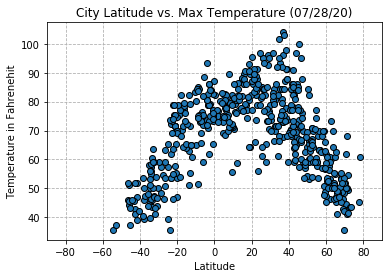

In [8]:
plt.scatter(cities_data["Lat"],cities_data["Max Temp"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Max Temperature (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenehit")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Humidity Plot

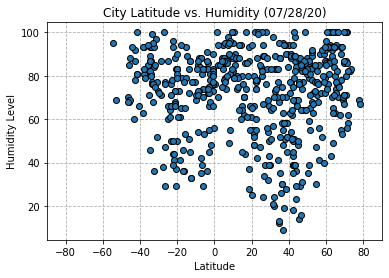

In [9]:
plt.scatter(cities_data["Lat"],cities_data["Humidity"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Humidity (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity Level")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Cloudiness Plot

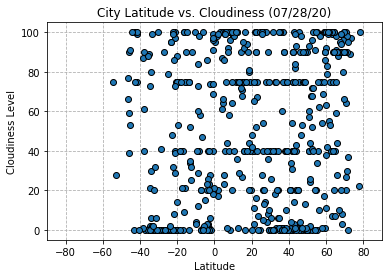

In [10]:
plt.scatter(cities_data["Lat"],cities_data["Cloudiness"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Cloudiness (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Level")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Wind Speed Plot

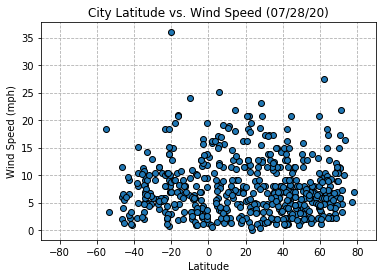

In [11]:
plt.scatter(cities_data["Lat"],cities_data["Wind Speed"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Wind Speed (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames
#Northern
n_hem=cities_data.loc[cities_data["Lat"] > 0]
#Southern
s_hem=cities_data.loc[cities_data["Lat"] < 0]

In [17]:
n_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,evensk,61.95,159.23,53.17,94,100,9.62,RU,1595974837
2,adand,46.86,18.16,75.99,74,53,4,HU,1595974837
6,kapaa,22.08,-159.32,82.4,74,90,20.8,US,1595974838
7,pevek,69.7,170.31,35.62,86,97,10.8,RU,1595974839
9,fuyu,45.18,124.82,73.63,76,75,6.42,CN,1595974839
...,...,...,...,...,...,...,...,...,...
546,tarazona,41.9,-1.73,77,64,31,13.87,ES,1595975014
547,kajaani,64.23,27.73,55.4,87,20,2.24,FI,1595975014
548,sisimiut,66.94,-53.67,47.01,75,10,5.44,GL,1595974857
550,kapit,2.02,112.93,72.93,94,99,0.63,MY,1595975015


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#Linear regression
values=linregress(n_hem["Lat"],n_hem["Max Temp"])
values
# (slope,intercept,rvalue,pvalue,stderr)

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


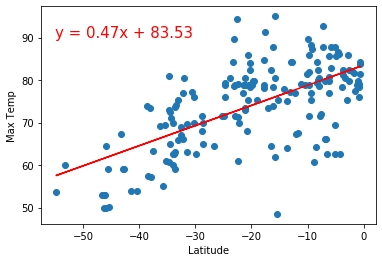

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


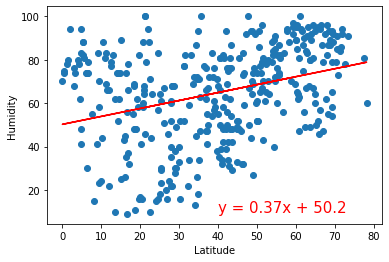

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


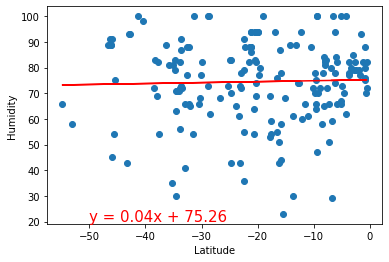

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


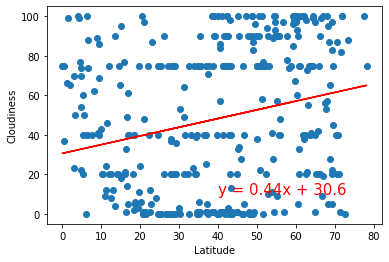

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


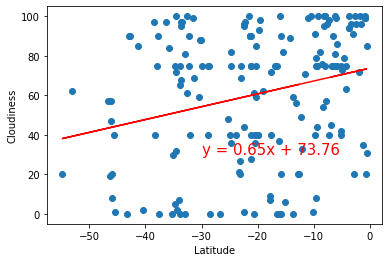

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


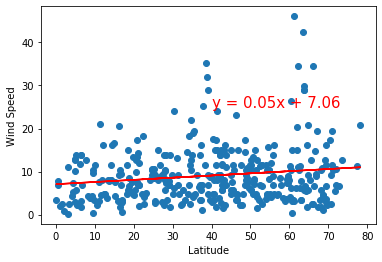

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


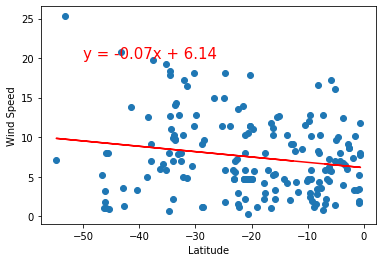